In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Basic Data Exploration:** Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [4]:
# Identify the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print('*'*70)

# Determine the data types of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)
print('*'*70 + '\n')

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Number of rows: 148654
Number of columns: 13
**********************************************************************

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
**********************************************************************


Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


**Descriptive Statistics:** Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [5]:
# Calculate basic statistics for the salary column
salary_statistics = df['TotalPay'].describe()

# Calculate mode separately because it can have multiple values
salary_mode = df['TotalPay'].mode()

# Calculate range, standard deviation
salary_range = df['TotalPay'].max() - df['TotalPay'].min()
salary_std_dev = df['TotalPay'].std()

# Calculate the median of the Salary column
salary_median = df['TotalPay'].median()

# Display the results
print("\nBasic Statistics for Salary:")
print(salary_statistics)
print('*'*70)

print("\nMode of Salary:")
print(salary_mode)
print('*'*70)

print("\nRange of Salary:")
print(salary_range)
print('*'*70)

print("\nStandard Deviation of Salary:")
print(salary_std_dev)
print('*'*70)

print("\nMedian of Salary:")
print(salary_median)
print('*'*70)



Basic Statistics for Salary:
count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64
**********************************************************************

Mode of Salary:
0    0.0
Name: TotalPay, dtype: float64
**********************************************************************

Range of Salary:
568213.56
**********************************************************************

Standard Deviation of Salary:
50517.00527394987
**********************************************************************

Median of Salary:
71426.60999999999
**********************************************************************


**Data Cleaning:** Handle missing data by suitable method with explain why you use it.

In [6]:
df.drop(columns=['Id'], inplace=True)
# this column dont give me any important info

In [7]:
df.drop(columns=['Notes', 'Status'], inplace=True)
#Both 'Notes' and 'Status' columns have all-null values, suggesting that these columns may not contain meaningful information.

In [8]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


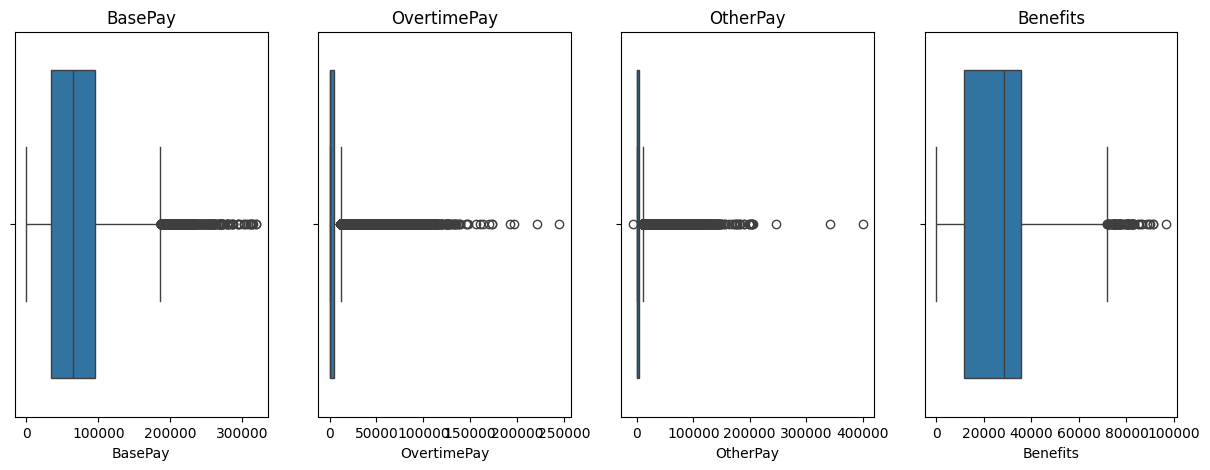

In [9]:
# Assuming df is your DataFrame
columns_to_plot = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Create box plots for each column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)

# Show the plots
plt.show()

In [10]:
# Impute missing values with the median of each respective column
#i used median because data contains outliers
df['BasePay'].fillna(df['BasePay'].median(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].median(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].median(), inplace=True)
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)


**Basic Data Visualization:** Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

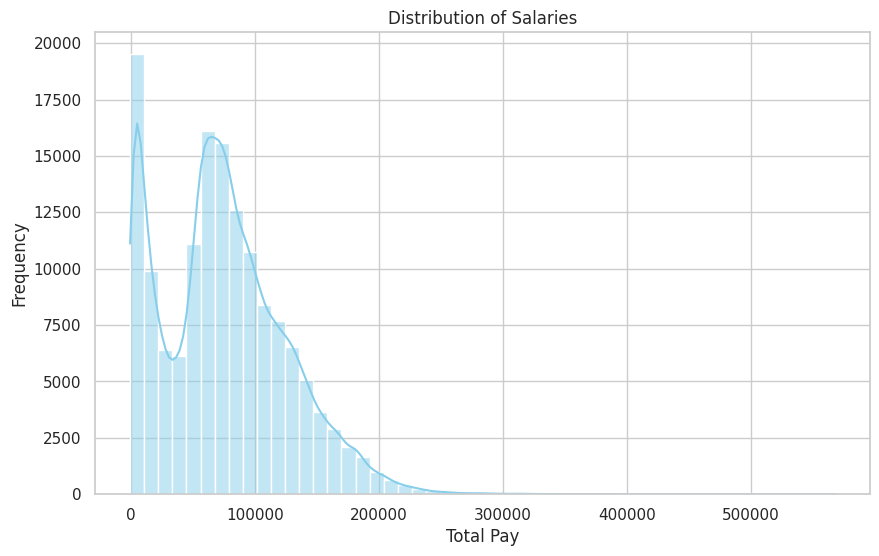

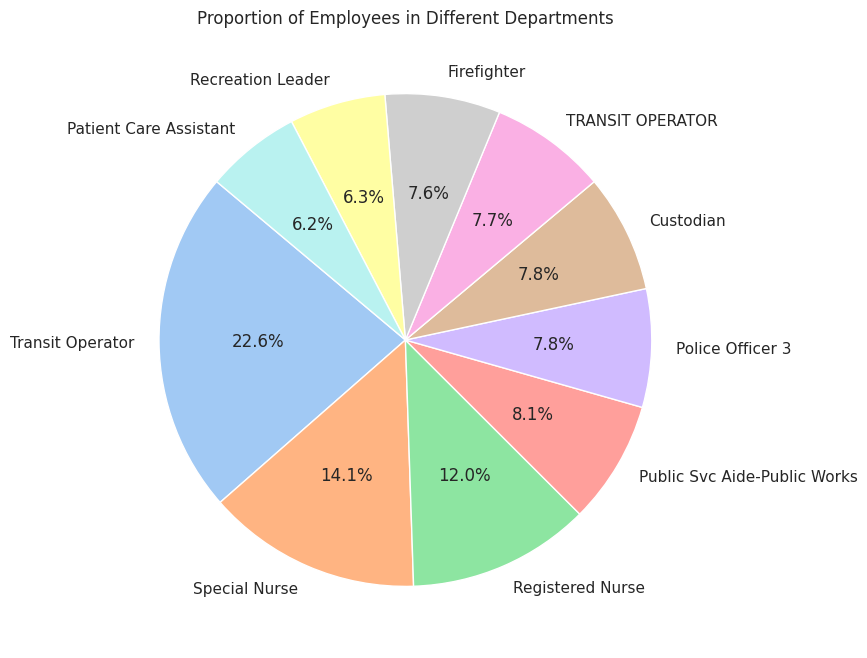

In [11]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a histogram for the distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

# Create a pie chart for the proportion of employees in different departments
plt.figure(figsize=(10, 8))
department_counts = df['JobTitle'].value_counts().head(10)  # Top 10 departments for illustration
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()


**Grouped Analysis:** Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

   Year  count          mean     min        max           std     median
0  2011  36159  71744.103871    0.00  567595.43  47498.706594  68213.240
1  2012  36766  74113.262265    0.00  362844.66  49523.904319  70714.680
2  2013  37606  77611.443142    0.00  347102.32  52854.774783  74500.015
3  2014  38123  75463.918140 -618.13  471952.64  51697.713029  72359.980


<ipython-input-13-8cccfe812a41>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='Year', data=top_n_years, palette='viridis')


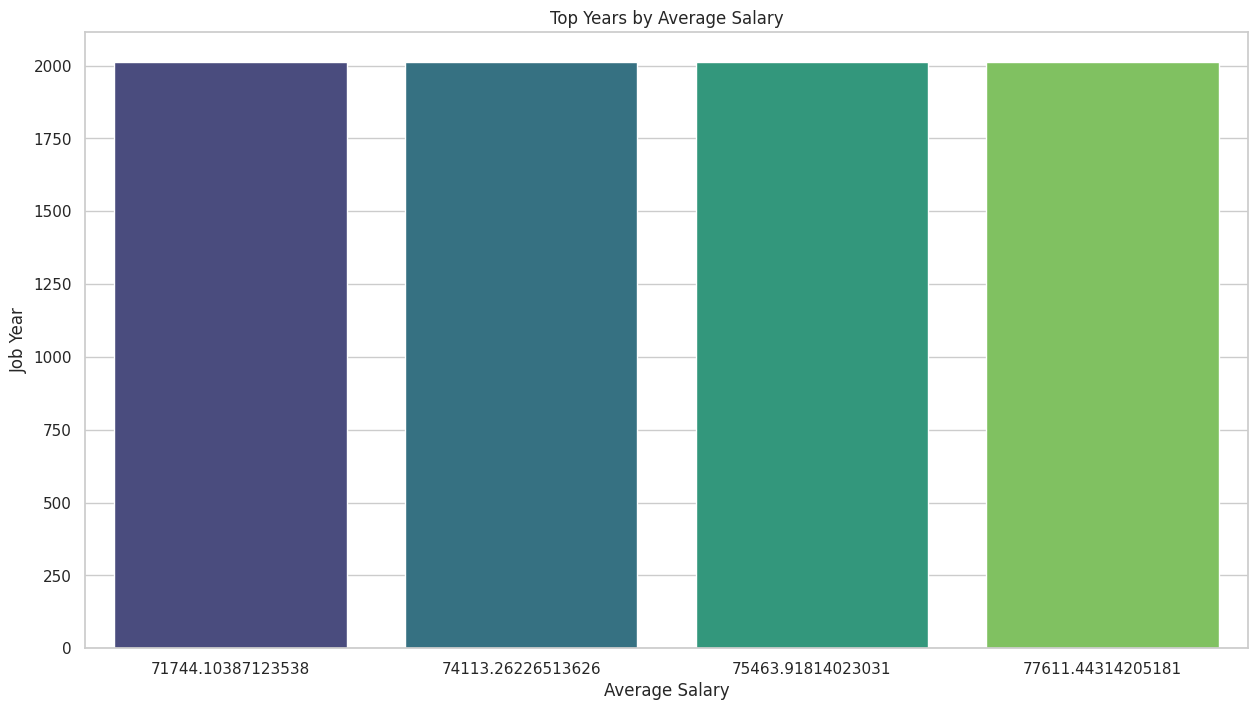

In [13]:
# Group the data by 'Year' and calculate summary statistics for the 'TotalPay' column
grouped_by_year = df.groupby('Year')['TotalPay'].agg(['count', 'mean', 'min', 'max', 'std', 'median']).reset_index()

# Display the summary statistics for each year
print(grouped_by_year)

# Plot a bar chart to compare average salaries across different years
plt.figure(figsize=(15, 8))
top_n_years = grouped_by_year.nlargest(5, 'mean')  # Adjust the number of top years as needed

sns.barplot(x='mean', y='Year', data=top_n_years, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Year')
plt.title('Top Years by Average Salary')
plt.show()


**Simple Correlation Analysis:** Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

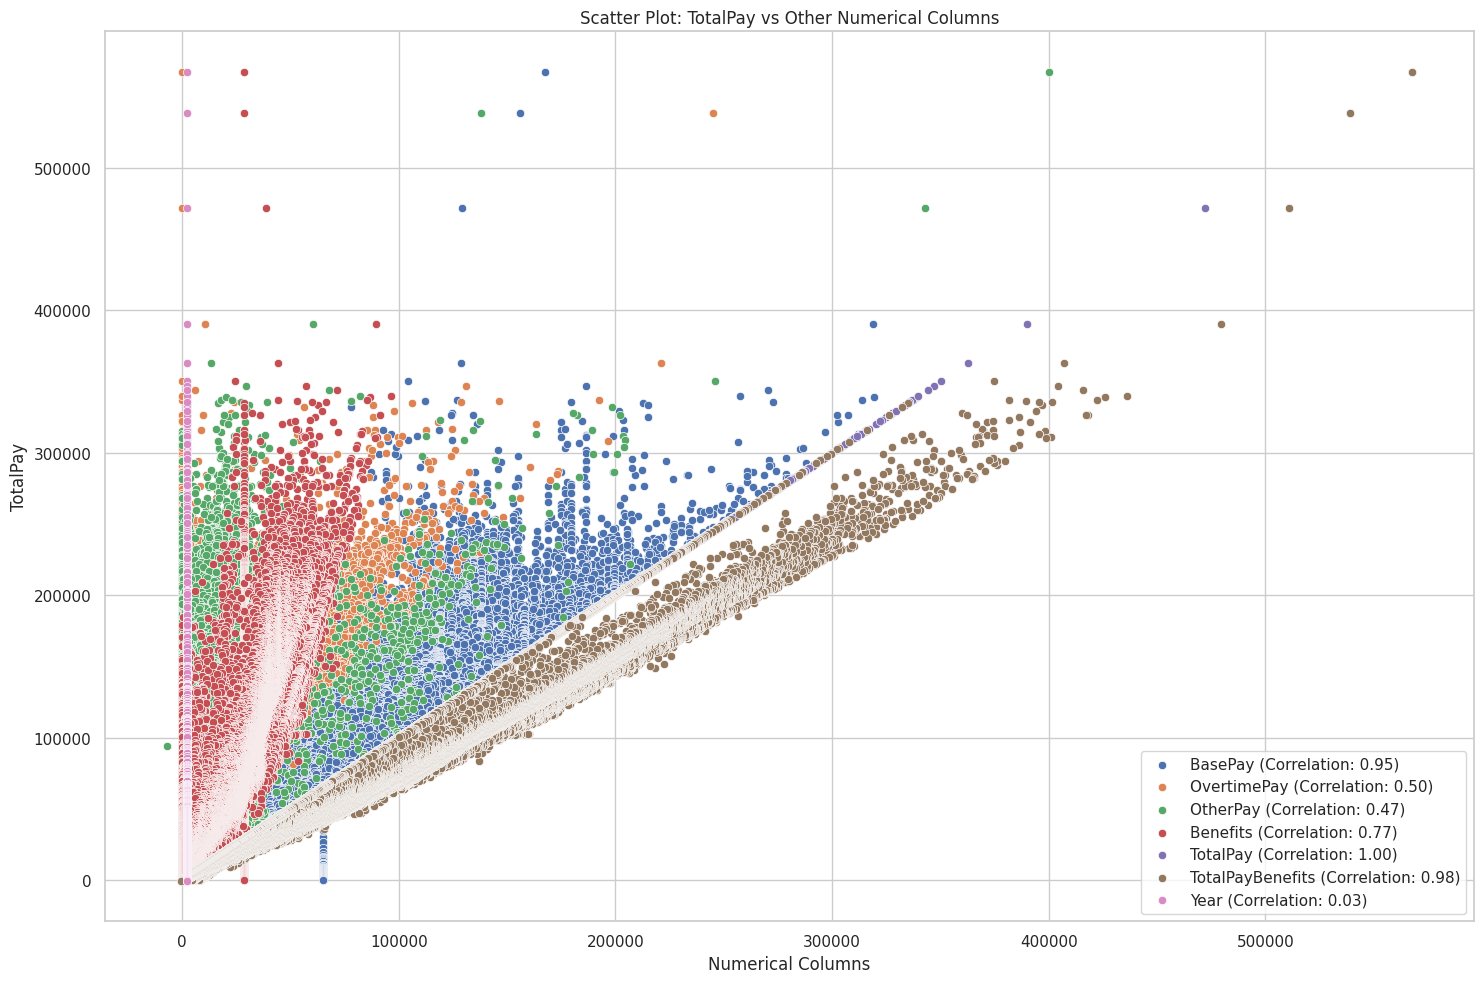

In [14]:
# Selecting all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate and plot correlations for each numerical column
plt.figure(figsize=(15, 10))
for column in numerical_columns:
    correlation = df['TotalPay'].corr(df[column])
    sns.scatterplot(x=column, y='TotalPay', data=df, label=f'{column} (Correlation: {correlation:.2f})')

plt.xlabel('Numerical Columns')
plt.ylabel('TotalPay')
plt.title('Scatter Plot: TotalPay vs Other Numerical Columns')
plt.legend()
plt.tight_layout()
plt.show()


**Summary of Insights:**

1. **Basic Data Exploration:**
   - The dataset contains 148,654 rows and 13 columns.
   - The columns include various data types such as integers, floats, and objects.
   - Notable columns with missing values include 'BasePay', 'OvertimePay', 'OtherPay', and 'Benefits'.

2. **Descriptive Statistics:**
   - The 'TotalPay' column exhibits a wide range of values with a mean of approximately $74,768.
   - The standard deviation is relatively high, indicating variability in salaries.
   - The minimum salary is negative, suggesting potential data entry errors or anomalies.
   - The mode is 0.0, indicating a significant number of instances with zero salary.
   - The median ('50%') italicized text provides a measure of central tendency at $71,426.

3. **Data Cleaning:**
   - The 'Id' column, which does not provide meaningful information, has been dropped.
   - Columns 'Notes' and 'Status' have been dropped due to having all-null values.
   - The missing values in 'BasePay', 'OvertimePay', 'OtherPay', and 'Benefits' have been imputed with their respective medians.

4. **Basic Data Visualization:**
   - A histogram has been created to visualize the distribution of salaries, showing a right-skewed pattern.
   - Most salaries are concentrated in the lower range, with a few higher values.

5. **Grouped Analysis:**
   - The data has been grouped by 'Year', and summary statistics for 'TotalPay' have been calculated.
   - A bar chart highlights the top years based on average salary, with the top 5 years displayed.

6. **Simple Correlation Analysis:**
   - Scatter plots were generated to explore the correlation between 'TotalPay' and other numerical columns.
   - Each plot includes the correlation coefficient, providing insights into the relationships.

